# Forecasting Assignment No.18

1.Airlines Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_excel('Airlines+Data.xlsx')
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [7]:
df.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [8]:
df.shape

(96, 1)

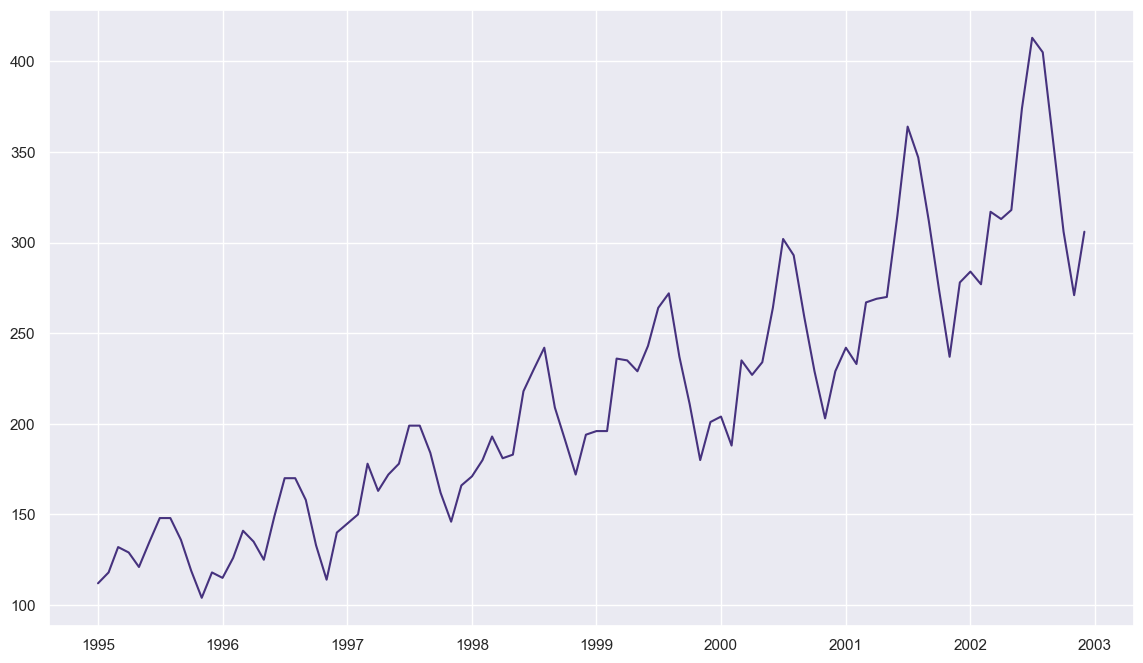

In [10]:
sns.set_theme(style='darkgrid',palette='viridis')
plt.figure(figsize=(14,8))
plt.plot(df)

<Axes: ylabel='Count'>

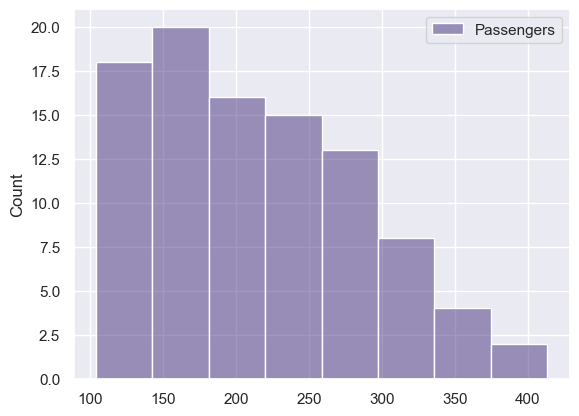

In [15]:
sns.histplot(df)

<Axes: ylabel='Density'>

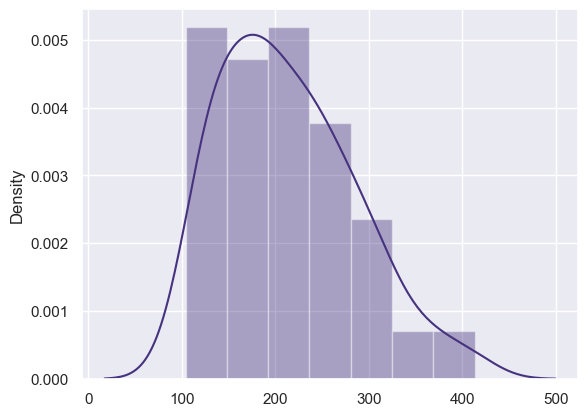

In [17]:
sns.distplot(df)

In [23]:
df["year"] = df['Month'].dt.strftime("%Y") # year extraction

In [24]:
df

,Month,Passengers,year
0,1995-01-01,112,1995
1,1995-02-01,118,1995
2,1995-03-01,132,1995
3,1995-04-01,129,1995
4,1995-05-01,121,1995
...,...,...,...
91,2002-08-01,405,2002
92,2002-09-01,355,2002
93,2002-10-01,306,2002
94,2002-11-01,271,2002


<Axes: xlabel='year', ylabel='Passengers'>

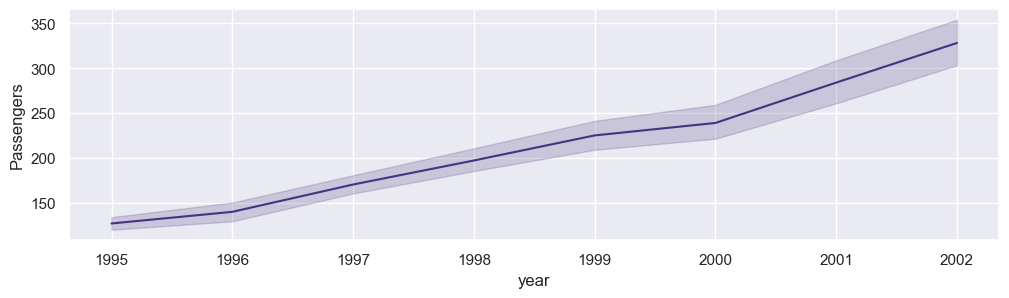

In [26]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=df)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

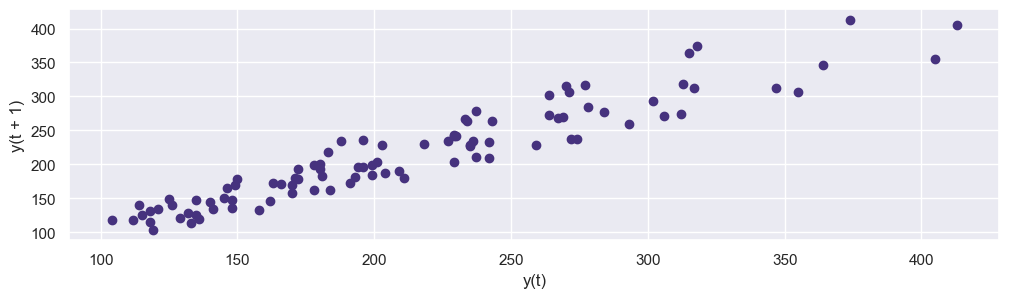

In [28]:
plt.figure(figsize=(12,3))
pd.plotting.lag_plot(df['Passengers'])

In [30]:
#Autocorrelation Plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

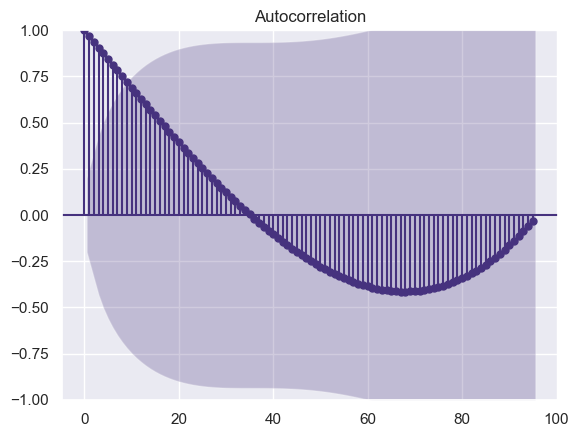

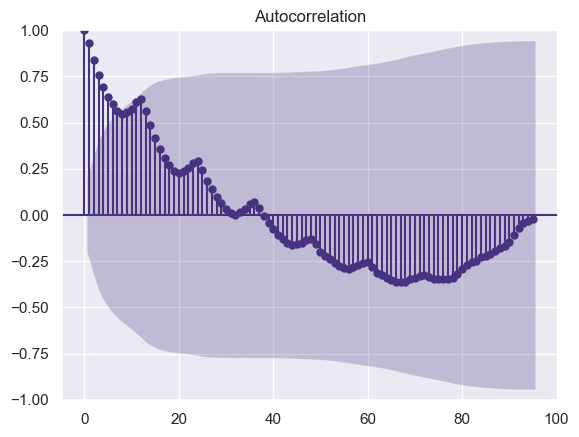

In [44]:
plot_acf(df['Month'],lags=95);
plot_acf(df['Passengers'],lags=95);

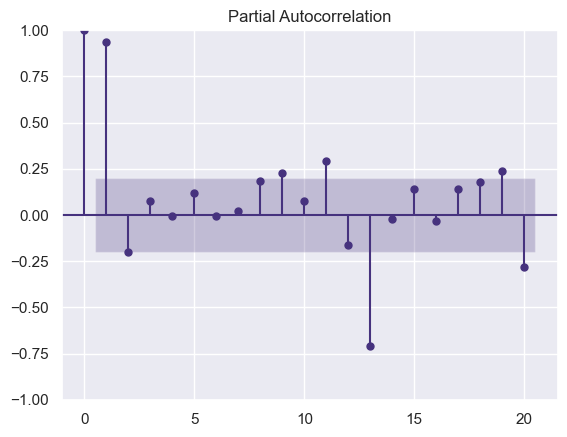

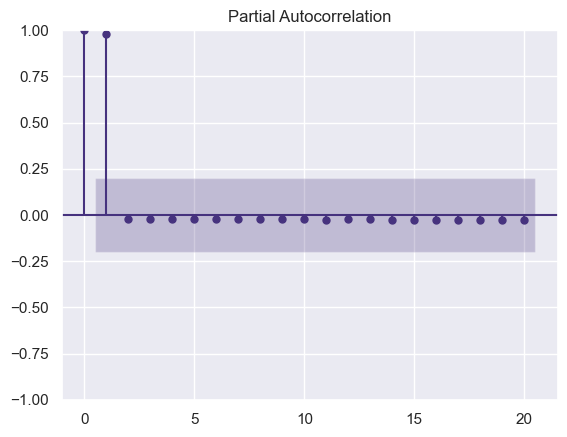

In [41]:
plot_pacf(df['Passengers']);
plot_pacf(df['Month']);

In [45]:
# Sampling and Basic Transformationn

In [46]:
df = pd.read_excel('Airlines+Data.xlsx',index_col=0, parse_dates=True)
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [47]:
df.shape

(96, 1)

In [48]:
# upsampling
upsampled = df.resample('D').mean()   #('D') represents daily samples
upsampled

,Passengers
Month,
1995-01-01,112.0
1995-01-02,NaN
1995-01-03,NaN
1995-01-04,NaN
1995-01-05,NaN
...,...
2002-11-27,NaN
2002-11-28,NaN
2002-11-29,NaN


In [49]:
# Interpolate the missing values
interpolated = upsampled.interpolate()
interpolated

,Passengers
Month,
1995-01-01,112.000000
1995-01-02,112.193548
1995-01-03,112.387097
1995-01-04,112.580645
1995-01-05,112.774194
...,...
2002-11-27,301.333333
2002-11-28,302.500000
2002-11-29,303.666667


<Axes: xlabel='Month'>

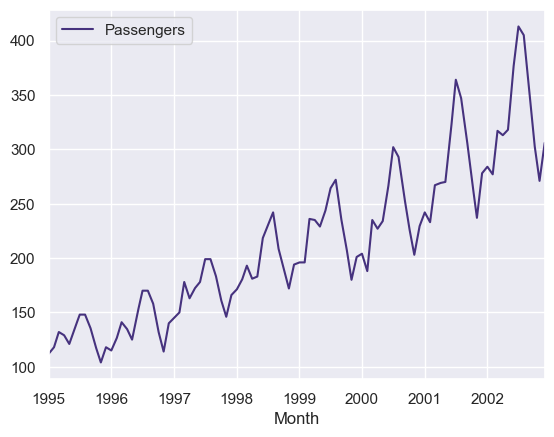

In [50]:
interpolated.plot()

<Axes: xlabel='Month'>

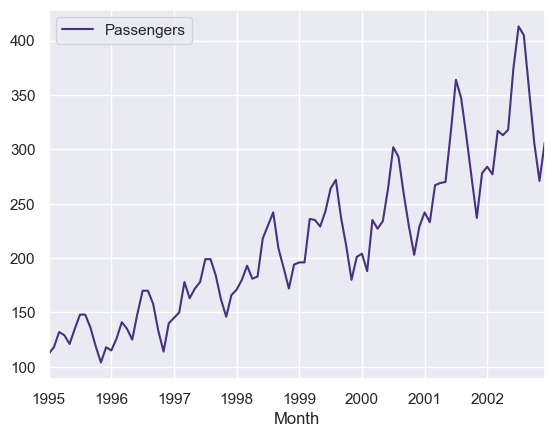

In [51]:
df.plot()

In [52]:
# Downsampling
downsampled = df.resample('Q').mean()
downsampled

,Passengers
Month,
1995-03-31,120.666667
1995-06-30,128.333333
1995-09-30,144.000000
1995-12-31,113.666667
1996-03-31,127.333333
1996-06-30,136.333333
1996-09-30,166.000000
1996-12-31,129.000000
1997-03-31,157.666667


<Axes: xlabel='Month'>

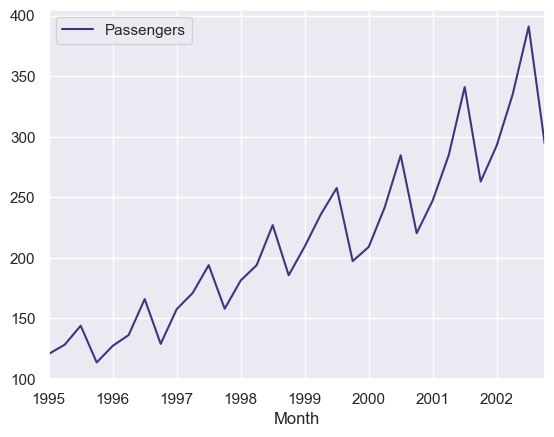

In [53]:
downsampled.plot()

In [54]:
# Transformation

In [55]:
df = pd.read_excel('Airlines+Data.xlsx',index_col=0,header=0 ,parse_dates=True)
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


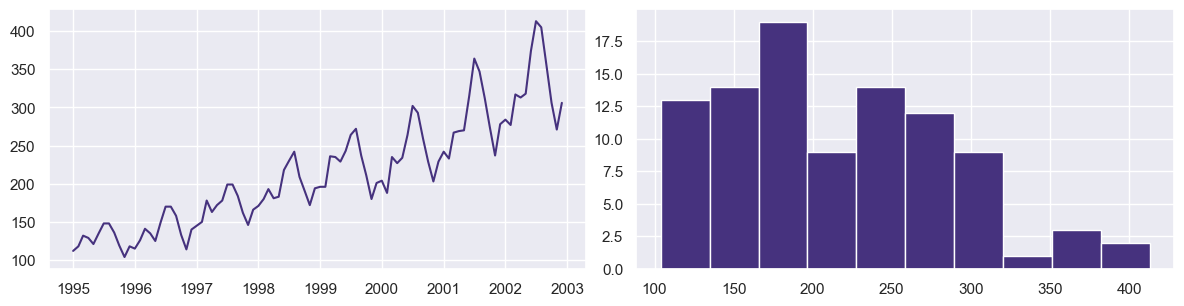

In [63]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.plot(df)

plt.subplot(2,2,2)
plt.hist(df)

plt.tight_layout()
plt.show()

In [66]:
# Log transform
data_lt = pd.DataFrame(np.log(df.values), columns= ['Passengers'])
data_lt

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
91,6.003887
92,5.872118
93,5.723585
94,5.602119


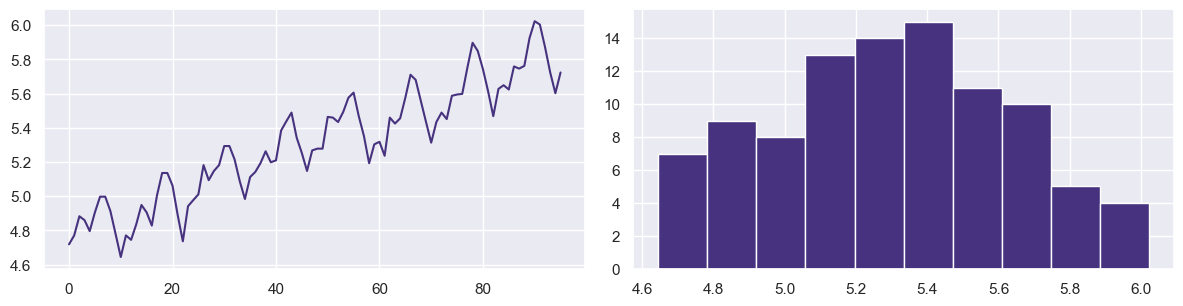

In [67]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.plot(data_lt['Passengers'])

plt.subplot(2,2,2)
plt.hist(data_lt['Passengers'])

plt.tight_layout()
plt.show()

In [68]:
# sqrt transform
data_sqt = pd.DataFrame(np.sqrt(df.values), columns= ['Passengers'])
data_sqt

,Passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000
...,...
91,20.124612
92,18.841444
93,17.492856
94,16.462078


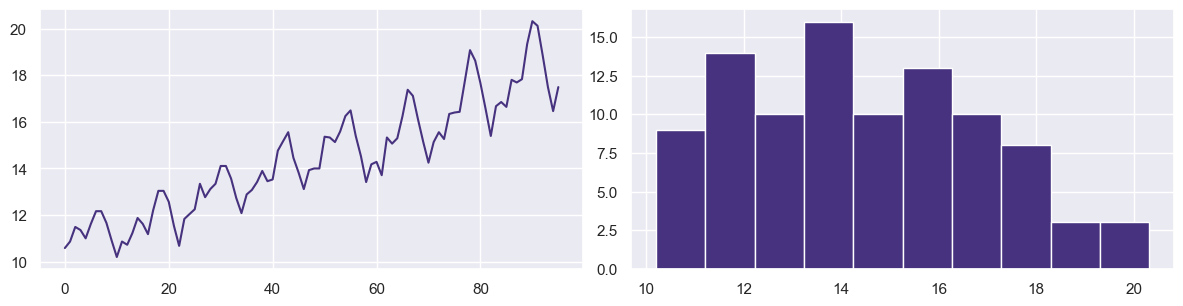

In [69]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.plot(data_sqt['Passengers'])

plt.subplot(2,2,2)
plt.hist(data_sqt['Passengers'])

plt.tight_layout()
plt.show()

FORECASTING MODEL BASED:

In [70]:
data = pd.read_excel('Airlines+Data.xlsx')
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<Axes: >

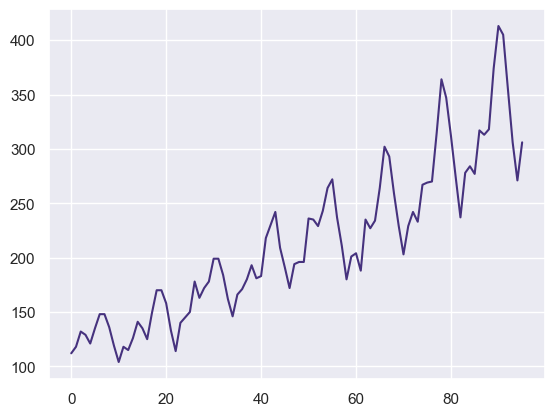

In [72]:
data['Passengers'].plot()

In [74]:
data['months'] = data['Month'].dt.strftime("%b") #Extracting Month
data['year'] = data['Month'].dt.strftime("%Y") #Extracting Year

In [75]:
data

,Month,Passengers,months,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [76]:
mp = pd.pivot_table(data=data,
                              values="Passengers",
                              index= "year",
                              columns= "months",
                              aggfunc= "mean",
                              fill_value=0
                   )
mp

months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<Axes: xlabel='months', ylabel='year'>

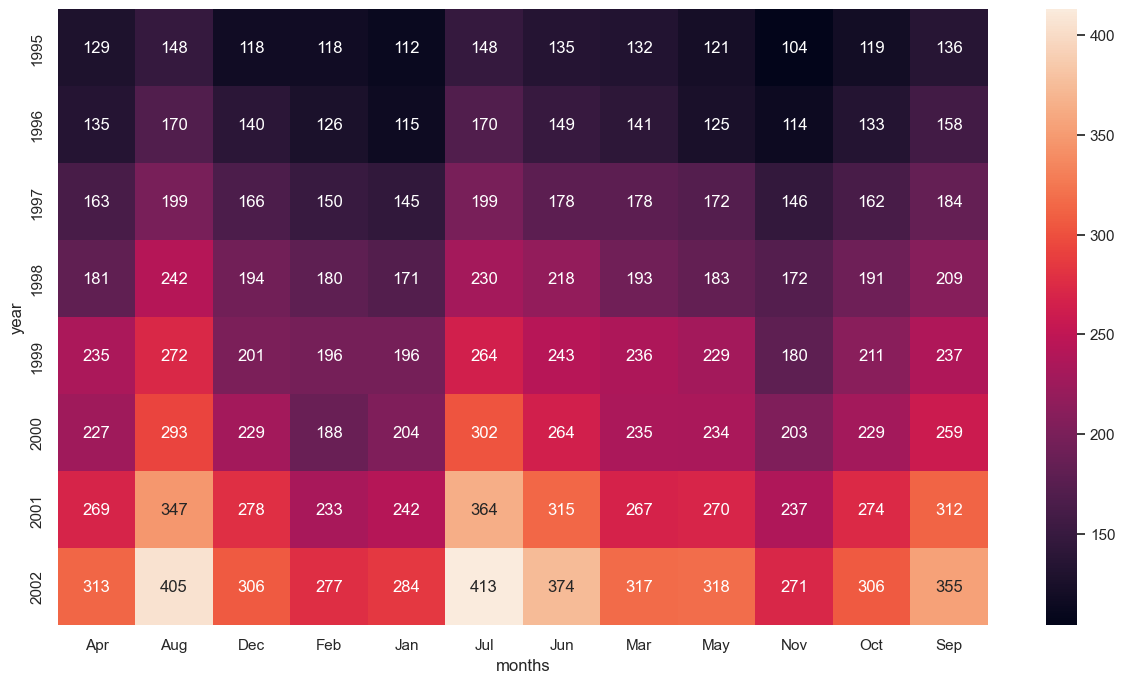

In [79]:
plt.figure(figsize=(15,8))
sns.heatmap(mp,annot=True,fmt="g")    # fmt is the format of Grid Values

<Axes: xlabel='year', ylabel='Passengers'>

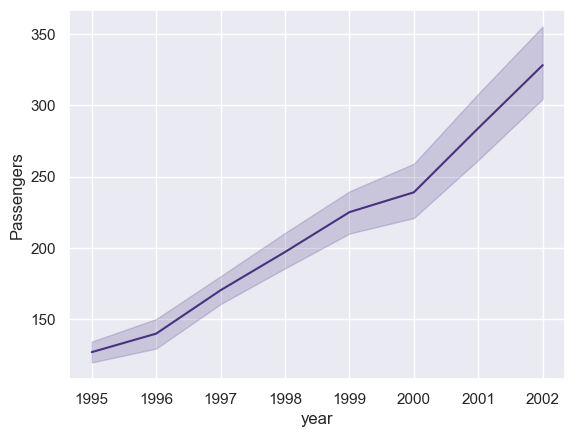

In [80]:
sns.lineplot(x = data['year'],y = data['Passengers'])

In [81]:
# Splitting data

In [82]:
data

,Month,Passengers,months,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [83]:
data.shape

(96, 4)

In [85]:
# Complete the dataset
data['t'] = np.arange(1,97)
data['t_square'] = np.square(data.t)
data['log_Passengers'] = np.log(data.Passengers)
data2 = pd.get_dummies(data['months'])

In [86]:
data.head()

,Month,Passengers,months,year,t,t_square,log_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791


In [87]:
data2.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [88]:
data3 = pd.concat([data,data2], axis=1)
data3

,Month,Passengers,months,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [91]:
Train = data3.head(84)
Test = data3.tail(12)

In [94]:
Train.head()

,Month,Passengers,months,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


In [95]:
Test.head()

,Month,Passengers,months,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
84,2002-01-01,284,Jan,2002,85,7225,5.648974,0,0,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,Feb,2002,86,7396,5.624018,0,0,0,1,0,0,0,0,0,0,0,0
86,2002-03-01,317,Mar,2002,87,7569,5.758902,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,Apr,2002,88,7744,5.746203,1,0,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,May,2002,89,7921,5.762051,0,0,0,0,0,0,0,0,1,0,0,0


In [96]:
from sklearn.metrics import mean_squared_error

In [97]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(mean_squared_error(Test['Passengers'], pred_linear))
rmse_linear

53.19923653480264

In [98]:
#Exponential Model

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(mean_squared_error(Test['Passengers'], pred_Exp))
rmse_Exp

325.7150613551535

In [99]:
#Quadratic Model

Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(mean_squared_error(Test['Passengers'],pred_Quad))
rmse_Quad

48.051888979331586

In [100]:
#Additive seasonality Model
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(mean_squared_error(Test['Passengers'], pred_add_sea))
rmse_add_sea

132.81978481421817

In [101]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(mean_squared_error(Test['Passengers'], pred_add_sea_quad))
rmse_add_sea_quad

26.36081761208163

In [102]:
#Multiplicative Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(mean_squared_error(Test['Passengers'], pred_Mult_add_sea))
rmse_Mult_add_sea 

325.6952488040335

In [104]:
#Compare the results 

compare = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(compare)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,26.360818
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_Mult_sea,325.695249
1,rmse_Exp,325.715061


In [2]:
# Moving Average
air = pd.read_excel('Airlines+Data.xlsx')
air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
Train = air.head(84)
Test = air.head(12)

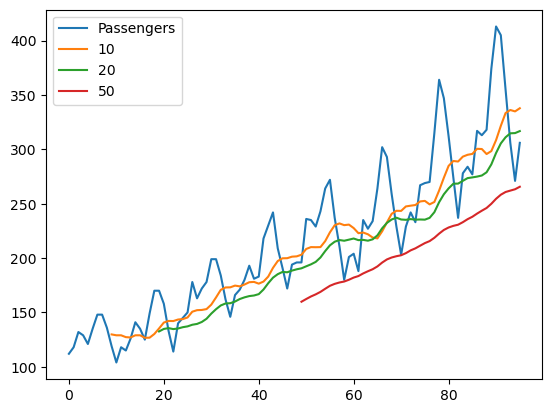

In [4]:
air['Passengers'].plot()
air['Passengers'].rolling(10).mean().plot(label = '10')
air['Passengers'].rolling(20).mean().plot(label = '20')
air['Passengers'].rolling(50).mean().plot(label = 50)
plt.legend()

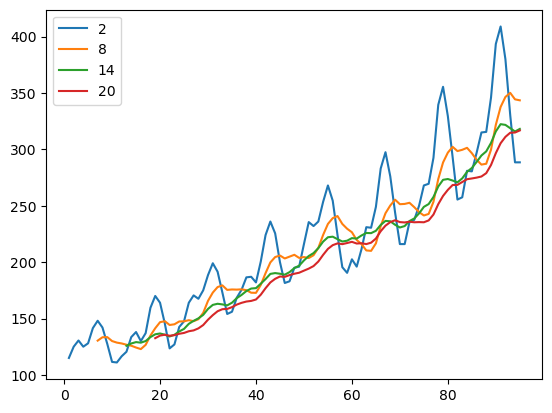

In [6]:
for i in range(2,24,6):
    air['Passengers'].rolling(i).mean().plot(label = str(i))
    plt.legend()

<Axes: >

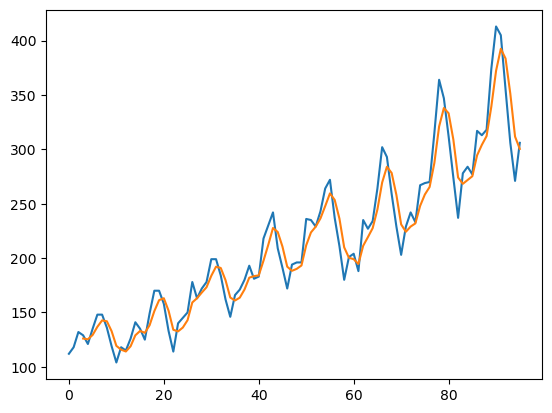

In [8]:
# Weighted Moving Average
weights = np.array([0.1, 0.2, 0.3,0.4])
air['WMA'] = air['Passengers'].rolling(4).apply(lambda x: np.sum(weights*x))
air
air['Passengers'].plot()
air['WMA'].plot()

In [11]:
# Forecasting By Arima Model
!pip install pmdarima

                                              0.0/614.7 kB ? eta -:--:--
                                              0.0/614.7 kB ? eta -:--:--
                                              10.2/614.7 kB ? eta -:--:--
     -                                     30.7/614.7 kB 262.6 kB/s eta 0:00:03
     -                                     30.7/614.7 kB 262.6 kB/s eta 0:00:03
     -                                     30.7/614.7 kB 262.6 kB/s eta 0:00:03
     --                                    41.0/614.7 kB 178.6 kB/s eta 0:00:04
     ---                                   61.4/614.7 kB 204.8 kB/s eta 0:00:03
     ---                                   61.4/614.7 kB 204.8 kB/s eta 0:00:03
     ---                                   61.4/614.7 kB 204.8 kB/s eta 0:00:03
     -----                                 92.2/614.7 kB 209.5 kB/s eta 0:00:03
     -----                                 92.2/614.7 kB 209.5 kB/s eta 0:00:03
     -------                              122.9/614.7 kB 232

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [12]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

In [14]:
air_d = pd.read_excel('Airlines+Data.xlsx',index_col=0,parse_dates=True)
air_d

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


<Axes: xlabel='Month'>

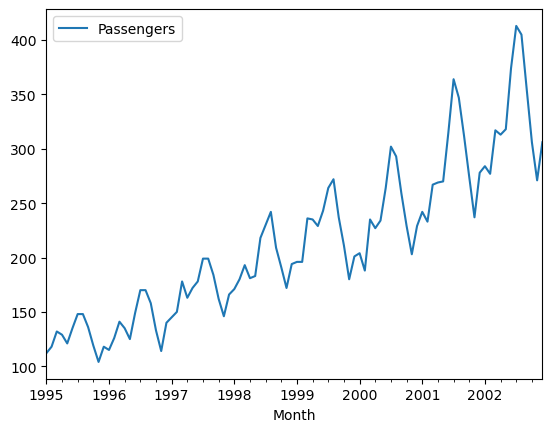

In [15]:
air_d.plot()

In [16]:
# Null hypothesis: Data is Non stationary
# Alternate Hypothesis: Data is Stationary
# If p< 0.05 ; Data is stationary
# if p>0.05; Data is not stationary
# According the p-value, the dataset is non-stationary as the p value is greater than alpha value.

adfuller(air_d['Passengers'])[1] 

0.9968250481137263